# #Swachhbharat - Twitter

## Shamritha S
## Project - 2 (Utkarshini Edutech)

## Twitter data Scrapper 

In [1]:
! pip install git+https://github.com/JustAnotherArchivist/snscrape.git

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to c:\users\shamritha\appdata\local\temp\pip-req-build-ylb58usx
  Created wheel for snscrape: filename=snscrape-0.4.3.20220107.dev20+g359cc25-py3-none-any.whl size=61381 sha256=61a491b75ae170b9d59793493f1ac9c6d2039cbcc7d6148e9e5524f191c9288f
  Stored in directory: C:\Users\shamritha\AppData\Local\Temp\pip-ephem-wheel-cache-fm_z3xye\wheels\92\42\87\33fa9b18f7a75d02643a9ca3743339aec9be28c6796267c7d8
Successfully built snscrape


  Running command git clone -q https://github.com/JustAnotherArchivist/snscrape.git 'C:\Users\shamritha\AppData\Local\Temp\pip-req-build-ylb58usx'


In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mt
import squarify 
import re
%matplotlib inline
import plotly.express as px

## Collecting data From Twitter 

In [24]:
maxtweets = 100000

s = '#swachhbharat since:2019-01-01 until:2022-01-31 lang:en'
tweet_lst = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper(s).get_items()):
    if i>maxtweets:
        break
    tweet_lst.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.hashtags, tweet.user.location])

In [72]:
tweet_data = pd.DataFrame(tweet_lst, columns=['Datetime', 'Tweet Id', 'Text', 'Username','hashtags','location'])

tweet_data

Datetime             Tweet Id  \
0      2022-01-30 16:40:45+00:00  1487828138608537602   
1      2022-01-30 16:35:39+00:00  1487826856581738505   
2      2022-01-30 16:34:34+00:00  1487826581670277124   
3      2022-01-30 15:50:27+00:00  1487815479779799041   
4      2022-01-30 15:35:16+00:00  1487811657493618693   
...                          ...                  ...   
99996  2019-07-23 13:30:45+00:00  1153658711870705666   
99997  2019-07-23 13:19:34+00:00  1153655897526325250   
99998  2019-07-23 12:48:37+00:00  1153648109668294658   
99999  2019-07-23 12:47:36+00:00  1153647852767174656   
100000 2019-07-23 12:30:10+00:00  1153643466129321987   

                                                     Text         Username  \
0       Please retweet: Let's #StopLittering for #Clea...    WeMeanToClean   
1       Let's segregate our waste with @WeMeanToClean ...    ManishKhurana   
2       Let's segregate our waste with @WeMeanToClean ...    SwatiBhalla23   
3       I am on-board in 15655 KYQ Katra Express @30th...            rhkm7   
4       Were you a part of this #WMTCSpotfix in #Saket...    WeMeanToClean   
...                                                   ...              ...   
99996   #DELHI, LET'S SEGREGATE OUR WASTE!\nWe can hel...    WeMeanToClean   
99997   #SustainableEarth #SwachhBharat #GreenEarth le...     banaras_wali   
99998   @cleanganganmcg @mowrrdgr @gssjodhpur @kataria...  rudrakumathakur   
99999   @FinancialXpress 7500 mnthly maintainence must...    marvelmachine   
100000  Please retweet: Let's #StopLittering for #Clea...    WeMeanToClean   

                                                 hashtags          location  
0       [StopLittering, CleanDelhi, SwachhBharat, MyCl...  New Delhi, Delhi  
1       [WeMeanToClean, CleanDelhi, SwachhBharat, MyCl...  New Delhi, India  
2       [WeMeanToClean, CleanDelhi, SwachhBharat, MyCl...  New Delhi, India  
3                           [IndianRailway, SwachhBharat]                    
4       [WMTCSpotfix, Saket, WeMeanToClean, CleanDelhi...  New Delhi, Delhi  
...                                                   ...               ...  
99996   [DELHI, WeMeanToClean, CleanDelhi, SwachhBhara...  New Delhi, Delhi  
99997   [SustainableEarth, SwachhBharat, GreenEarth, P...   Varanasi, India  
99998                           [SwachhBharat, MeriSadak]            Bharat  
99999                                      [SwachhBharat]                    
100000  [StopLittering, CleanDelhi, SwachhBharat, MyCl...  New Delhi, Delhi  

[100001 rows x 6 columns]

In [74]:
tweet_data1 = tweet_data.dropna().reset_index(drop=False)

In [75]:
tweet_data1.isnull().sum()

index       0
Datetime    0
Tweet Id    0
Text        0
Username    0
hashtags    0
location    0
dtype: int64

## Creating a DataFrame for Hashtags 

In [76]:
hash=[]
for i in range(99973):
    for j in range(len(tweet_data1['hashtags'][i])):
        hash.append([tweet_data1['hashtags'][i][j],tweet_data1['Datetime'][i]])

In [77]:
for i in range(len(hash)):
        hash[i][0] = hash[i][0].lower()

In [78]:
dataset_hash = pd.DataFrame(hash,columns=['Hashtags', 'Datetime'])
dataset_hash

Hashtags                  Datetime
0       stoplittering 2022-01-30 16:40:45+00:00
1          cleandelhi 2022-01-30 16:40:45+00:00
2        swachhbharat 2022-01-30 16:40:45+00:00
3        mycleanindia 2022-01-30 16:40:45+00:00
4       wemeantoclean 2022-01-30 16:40:45+00:00
...               ...                       ...
554130     greenearth 2019-07-23 13:19:34+00:00
554131        plastic 2019-07-23 13:19:34+00:00
554132   swachhbharat 2019-07-23 12:48:37+00:00
554133      merisadak 2019-07-23 12:48:37+00:00
554134   swachhbharat 2019-07-23 12:47:36+00:00

[554135 rows x 2 columns]

In [81]:
dataset_hash.to_csv('hashtags_swachhbharat.csv')

In [2]:
hash_1 = pd.read_csv('hashtags_swachhbharat.csv')
hash_1

Unnamed: 0       Hashtags                   Datetime
0                0  stoplittering  2022-01-30 16:40:45+00:00
1                1     cleandelhi  2022-01-30 16:40:45+00:00
2                2   swachhbharat  2022-01-30 16:40:45+00:00
3                3   mycleanindia  2022-01-30 16:40:45+00:00
4                4  wemeantoclean  2022-01-30 16:40:45+00:00
...            ...            ...                        ...
554130      554130     greenearth  2019-07-23 13:19:34+00:00
554131      554131        plastic  2019-07-23 13:19:34+00:00
554132      554132   swachhbharat  2019-07-23 12:48:37+00:00
554133      554133      merisadak  2019-07-23 12:48:37+00:00
554134      554134   swachhbharat  2019-07-23 12:47:36+00:00

[554135 rows x 3 columns]

## Converting The Scrapped data to csv file.

In [83]:
tweet_data1.to_csv('swachhbharat_twitterdata.csv')

In [3]:
data = pd.read_csv('swachhbharat_twitterdata.csv')
data

Unnamed: 0   index                   Datetime             Tweet Id  \
0               0       0  2022-01-30 16:40:45+00:00  1487828138608537602   
1               1       1  2022-01-30 16:35:39+00:00  1487826856581738505   
2               2       2  2022-01-30 16:34:34+00:00  1487826581670277124   
3               3       3  2022-01-30 15:50:27+00:00  1487815479779799041   
4               4       4  2022-01-30 15:35:16+00:00  1487811657493618693   
...           ...     ...                        ...                  ...   
99969       99969   99996  2019-07-23 13:30:45+00:00  1153658711870705666   
99970       99970   99997  2019-07-23 13:19:34+00:00  1153655897526325250   
99971       99971   99998  2019-07-23 12:48:37+00:00  1153648109668294658   
99972       99972   99999  2019-07-23 12:47:36+00:00  1153647852767174656   
99973       99973  100000  2019-07-23 12:30:10+00:00  1153643466129321987   

                                                    Text         Username  \
0      Please retweet: Let's #StopLittering for #Clea...    WeMeanToClean   
1      Let's segregate our waste with @WeMeanToClean ...    ManishKhurana   
2      Let's segregate our waste with @WeMeanToClean ...    SwatiBhalla23   
3      I am on-board in 15655 KYQ Katra Express @30th...            rhkm7   
4      Were you a part of this #WMTCSpotfix in #Saket...    WeMeanToClean   
...                                                  ...              ...   
99969  #DELHI, LET'S SEGREGATE OUR WASTE!\nWe can hel...    WeMeanToClean   
99970  #SustainableEarth #SwachhBharat #GreenEarth le...     banaras_wali   
99971  @cleanganganmcg @mowrrdgr @gssjodhpur @kataria...  rudrakumathakur   
99972  @FinancialXpress 7500 mnthly maintainence must...    marvelmachine   
99973  Please retweet: Let's #StopLittering for #Clea...    WeMeanToClean   

                                                hashtags          location  
0      ['StopLittering', 'CleanDelhi', 'SwachhBharat'...  New Delhi, Delhi  
1      ['WeMeanToClean', 'CleanDelhi', 'SwachhBharat'...  New Delhi, India  
2      ['WeMeanToClean', 'CleanDelhi', 'SwachhBharat'...  New Delhi, India  
3                      ['IndianRailway', 'SwachhBharat']               NaN  
4      ['WMTCSpotfix', 'Saket', 'WeMeanToClean', 'Cle...  New Delhi, Delhi  
...                                                  ...               ...  
99969  ['DELHI', 'WeMeanToClean', 'CleanDelhi', 'Swac...  New Delhi, Delhi  
99970  ['SustainableEarth', 'SwachhBharat', 'GreenEar...   Varanasi, India  
99971                      ['SwachhBharat', 'MeriSadak']            Bharat  
99972                                   ['SwachhBharat']               NaN  
99973  ['StopLittering', 'CleanDelhi', 'SwachhBharat'...  New Delhi, Delhi  

[99974 rows x 8 columns]

## Data Cleaning

In [4]:
isna_value = data.isna()
isna_value

Unnamed: 0  index  Datetime  Tweet Id   Text  Username  hashtags  \
0           False  False     False     False  False     False     False   
1           False  False     False     False  False     False     False   
2           False  False     False     False  False     False     False   
3           False  False     False     False  False     False     False   
4           False  False     False     False  False     False     False   
...           ...    ...       ...       ...    ...       ...       ...   
99969       False  False     False     False  False     False     False   
99970       False  False     False     False  False     False     False   
99971       False  False     False     False  False     False     False   
99972       False  False     False     False  False     False     False   
99973       False  False     False     False  False     False     False   

       location  
0         False  
1         False  
2         False  
3          True  
4         False  
...         ...  
99969     False  
99970     False  
99971     False  
99972      True  
99973     False  

[99974 rows x 8 columns]

In [5]:
print(data.isnull().values.any())

True


In [6]:
data.isnull().sum()

Unnamed: 0        0
index             0
Datetime          0
Tweet Id          0
Text              0
Username          0
hashtags          0
location      10041
dtype: int64

In [7]:
df = data.dropna().reset_index(drop=False)

In [8]:
df.isnull().sum()

level_0       0
Unnamed: 0    0
index         0
Datetime      0
Tweet Id      0
Text          0
Username      0
hashtags      0
location      0
dtype: int64

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df.drop('index', axis=1, inplace=True)

## Plot and Prepare a frequency chart for the hashtags.

In [11]:
hash_1 = pd.read_csv('hashtags_swachhbharat.csv')
hash_1

Unnamed: 0       Hashtags                   Datetime
0                0  stoplittering  2022-01-30 16:40:45+00:00
1                1     cleandelhi  2022-01-30 16:40:45+00:00
2                2   swachhbharat  2022-01-30 16:40:45+00:00
3                3   mycleanindia  2022-01-30 16:40:45+00:00
4                4  wemeantoclean  2022-01-30 16:40:45+00:00
...            ...            ...                        ...
554130      554130     greenearth  2019-07-23 13:19:34+00:00
554131      554131        plastic  2019-07-23 13:19:34+00:00
554132      554132   swachhbharat  2019-07-23 12:48:37+00:00
554133      554133      merisadak  2019-07-23 12:48:37+00:00
554134      554134   swachhbharat  2019-07-23 12:47:36+00:00

[554135 rows x 3 columns]

In [12]:
hash_1['Datetime']=pd.to_datetime(hash_1['Datetime'])

In [13]:
hash_1['Dates']=hash_1['Datetime'].dt.to_period('D').astype(str)

C:\Users\shamritha\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [14]:
dataset_hashtag = pd.DataFrame(hash_1['Hashtags'].value_counts(),columns=['Hashtags']).reset_index(drop=False)

In [15]:
dataset_hashtag.rename(columns = {'Hashtags':'Frequency'}, inplace = True)

In [16]:
dataset_hashtag.rename(columns = {'index':'Hashtags'}, inplace = True)

In [17]:
dataset_hashtag

Hashtags  Frequency
0             swachhbharat     100720
1            wemeantoclean      32933
2               cleandelhi      32537
3             mycleanindia      31912
4          wastemanagement      21558
...                    ...        ...
23269           svmgogreen          1
23270  directmoneytransfer          1
23271                  ttd          1
23272          cleanairday          1
23273    swachhsingasandra          1

[23274 rows x 2 columns]

In [17]:
dataset_hashtag.to_csv('swachhbharat_twitterHashtags.csv')

In [18]:
dataset_hashtag_twitter = pd.read_csv('swachhbharat_twitterHashtags.csv')
dataset_hashtag_twitter

Unnamed: 0                            Hashtags  Frequency
0               0                        swachhbharat     100720
1               1                       wemeantoclean      32933
2               2                          cleandelhi      32537
3               3                        mycleanindia      31912
4               4                     wastemanagement      21558
...           ...                                 ...        ...
23269       23269                       politicstoday          1
23270       23270                             commies          1
23271       23271  govtmedicalcollegehospitalanantang          1
23272       23272                      cleanertoilets          1
23273       23273                         corprorates          1

[23274 rows x 3 columns]

In [19]:
dataset_hashtag_twitter.drop('Unnamed: 0', axis=1, inplace=True)

In [20]:
dataset_hashtag = dataset_hashtag.sort_values('Frequency',ascending=False).reset_index(drop=False)

In [21]:
import plotly.express as px

fig = px.bar(dataset_hashtag[:30], x='Hashtags', y='Frequency',
              color='Hashtags',
              color_discrete_sequence=["navy", "darkmagenta", "darkmagenta", "navy", "mediumvioletred",
                                       "mediumvioletred", "mediumvioletred", "navy", "pink", "magenta",
                                       "navy", "magenta", "mediumvioletred", "navy", "darkmagenta",
                                       "navy", "magenta", "magenta", "magenta", 
                                       "magenta","mediumvioletred","darkmagenta","pink","darkmagenta",
                                       "darkmagenta","navy","navy","navy","magenta","darkmagenta"],
              height=600, width=900)
fig.show()

### Conclusion 
- The above Plots shows the frequently occured hashtags.
- Here, The hashtag swatchhbharat has been talked about the most compared to others.
- And the second and third most used hashtags are wemeantoclean and cleandelhi
- The main aim of the swatchhbharat policy was to prevent littering, stop pollution and to do afforestation.

In [22]:
! pip install squarify

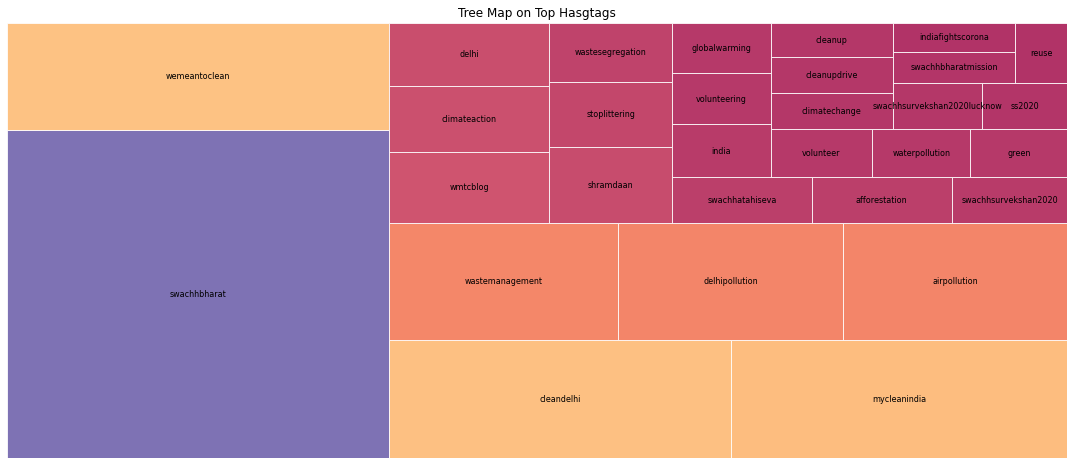

In [23]:
import squarify 
cmap = mt.cm.Spectral
mini=min(dataset_hashtag_twitter['Frequency'][0:30])
maxi=max(dataset_hashtag_twitter['Frequency'][0:30])
norm = mt.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in dataset_hashtag_twitter['Frequency'][0:30]]
plt.figure(figsize=(19,8))
squarify.plot(sizes=dataset_hashtag_twitter['Frequency'][0:30],label=dataset_hashtag_twitter['Hashtags'][0:30], alpha=.8,color=colors,text_kwargs={'fontsize':8,'color':'black'},linewidth='1',edgecolor="white")

plt.title('Tree Map on Top Hasgtags')

plt.axis('off')
plt.show()

### Conclusion
- To solve problems like littering, pollution, climate change, global warming, the policy swachh bharat abhiyan was introduced.
- we can observe that this policy can be made effective by waste segregation, cleanup drive, reuse, afforestation and by avoiding littering.

# Sentiment Analysis 

In [23]:
import re
df['Text'] =df['Text'].str.replace('\d+','') #digits
df['Text'] =df['Text'].str.replace('.','')

In [24]:
def remove_pattern(input_txt):
    r = re.sub("[^a-zA-Z]"," ",str(input_txt)) # if doesn't start with a-z
    r = re.findall(r"@(w+)", str(input_txt))   # @..
    for i in r:
        input_txt = re.sub(i, '', input_txt)      
    return input_txt

In [25]:
df['@_remove'] = np.vectorize(remove_pattern)(df['Text']) 
df['@_remove'][:3]

0    Please retweet: Let's #StopLittering for #Clea...
1    Let's segregate our waste with @WeMeanToClean ...
2    Let's segregate our waste with @WeMeanToClean ...
Name: @_remove, dtype: object

In [26]:
def cleanTxt(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text))
    text=re.sub(r'#','',str(text))
    text=re.sub('http[^\s]+','',str(text))
    text=re.sub(r'@[A-Za-z0-9]+','',str(text))
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', str(text))

df['Text']=df['Text'].apply(cleanTxt)

In [26]:
! pip install vaderSentiment

In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    if sentiment_dict['compound'] >= 0.05 :
        return "pos"
    elif sentiment_dict['compound'] <= - 0.05 :
        return "neg"
    else :
        return "neu"

In [28]:
l=[sentiment_scores(i) for i in df.Text]
df["labels"] = l

## Donut chart for Sentiment Analysis

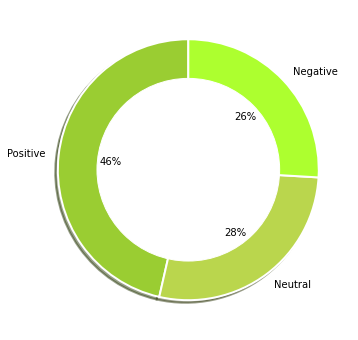

In [29]:
fig = plt.figure(figsize =(10, 6))
plt.pie(df.labels.value_counts(), autopct='%1.0f%%',startangle=90,colors=['yellowgreen','#bad64d','greenyellow'],shadow=True,labels=['Positive','Neutral','Negative'],
        wedgeprops={"edgecolor":"white",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

## Sentiment Analysis Plot for period of every six months in Year

In [30]:
df['Datetime']=pd.to_datetime(df['Datetime'])
df['month']=df['Datetime'].dt.to_period('M').astype(str)

C:\Users\shamritha\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



C:\Users\shamritha\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3245: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\shamritha\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



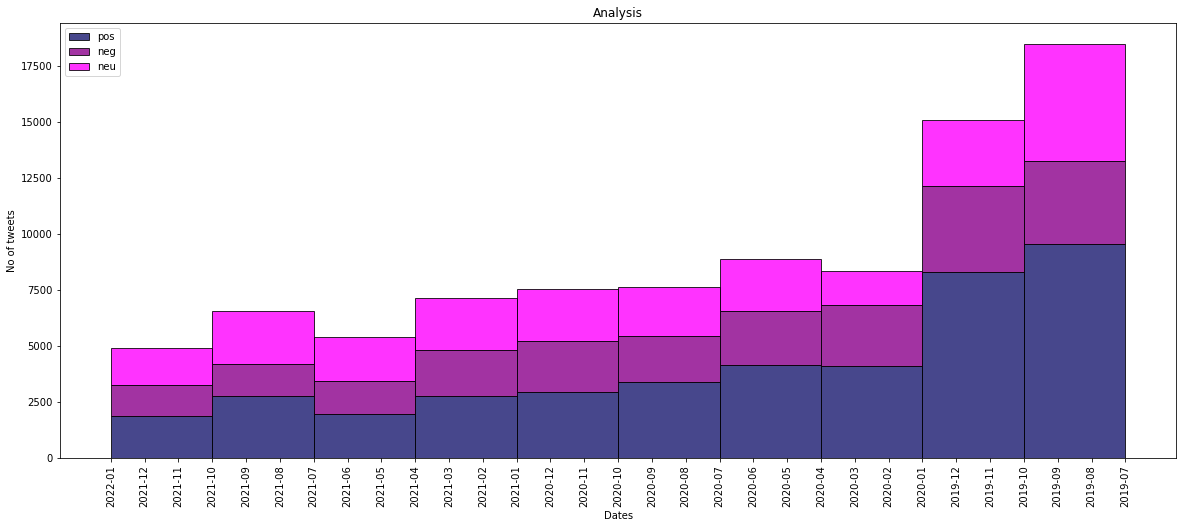

In [31]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(20,8))

cl_df = df["month"][df["labels"] == "pos"]
sa_df = df["month"][df["labels"] == "neg"]
tr_df = df["month"][df["labels"] == "neu"]
plt.hist([cl_df, sa_df,tr_df],label=["pos", "neg", "neu"],stacked=True,edgecolor = "black",alpha=0.8,color=['midnightblue','darkmagenta','fuchsia'])
plt.legend()
plt.title("Analysis")
plt.xlabel("Dates")
plt.ylabel("No of tweets")
plt.xticks(rotation=90)
plt.show()

## Sentiment Analysis Plot for Weekly data 

In [32]:
# df.loc[1, 'Text']

In [33]:
df['Week']=df['Datetime'].dt.to_period('W').astype(str)

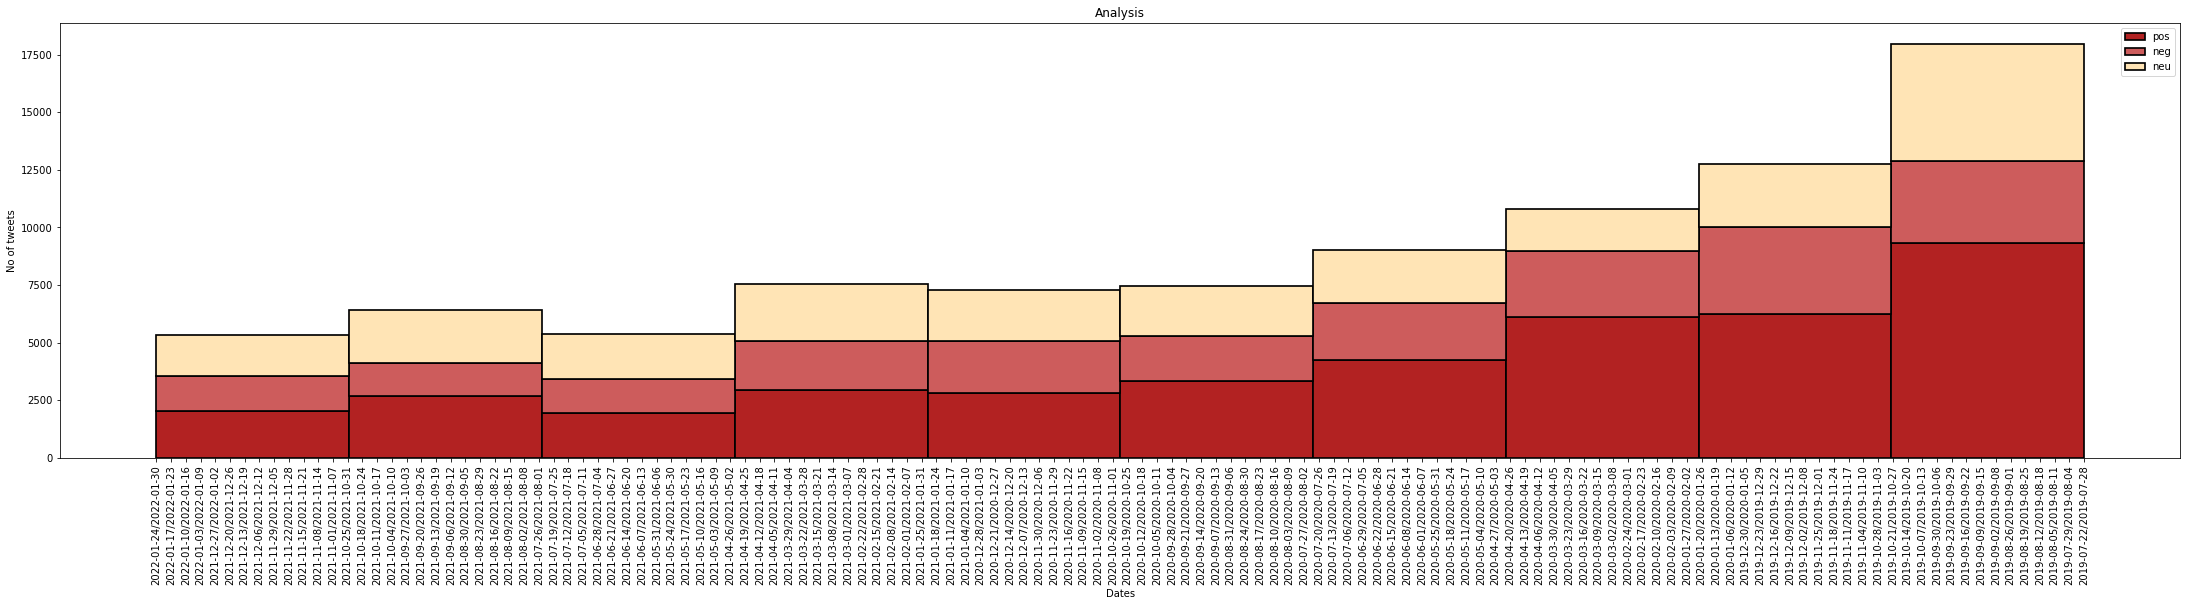

In [34]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(38,8))

cl_df = df["Week"][df["labels"] == "pos"]
sa_df = df["Week"][df["labels"] == "neg"]
tr_df = df["Week"][df["labels"] == "neu"]
plt.hist([cl_df, sa_df,tr_df],label=["pos", "neg", "neu"],stacked=True,edgecolor = "black",linewidth=1.7,color=['firebrick','indianred','moccasin'])
plt.legend()
plt.title("Analysis")
plt.xlabel("Dates")
plt.ylabel("No of tweets")
plt.xticks(rotation=90)
plt.show()

## Plot for Sentiment Analysis for Daily Data

In [35]:
df['days']=df['Datetime'].dt.to_period('D').astype(str)

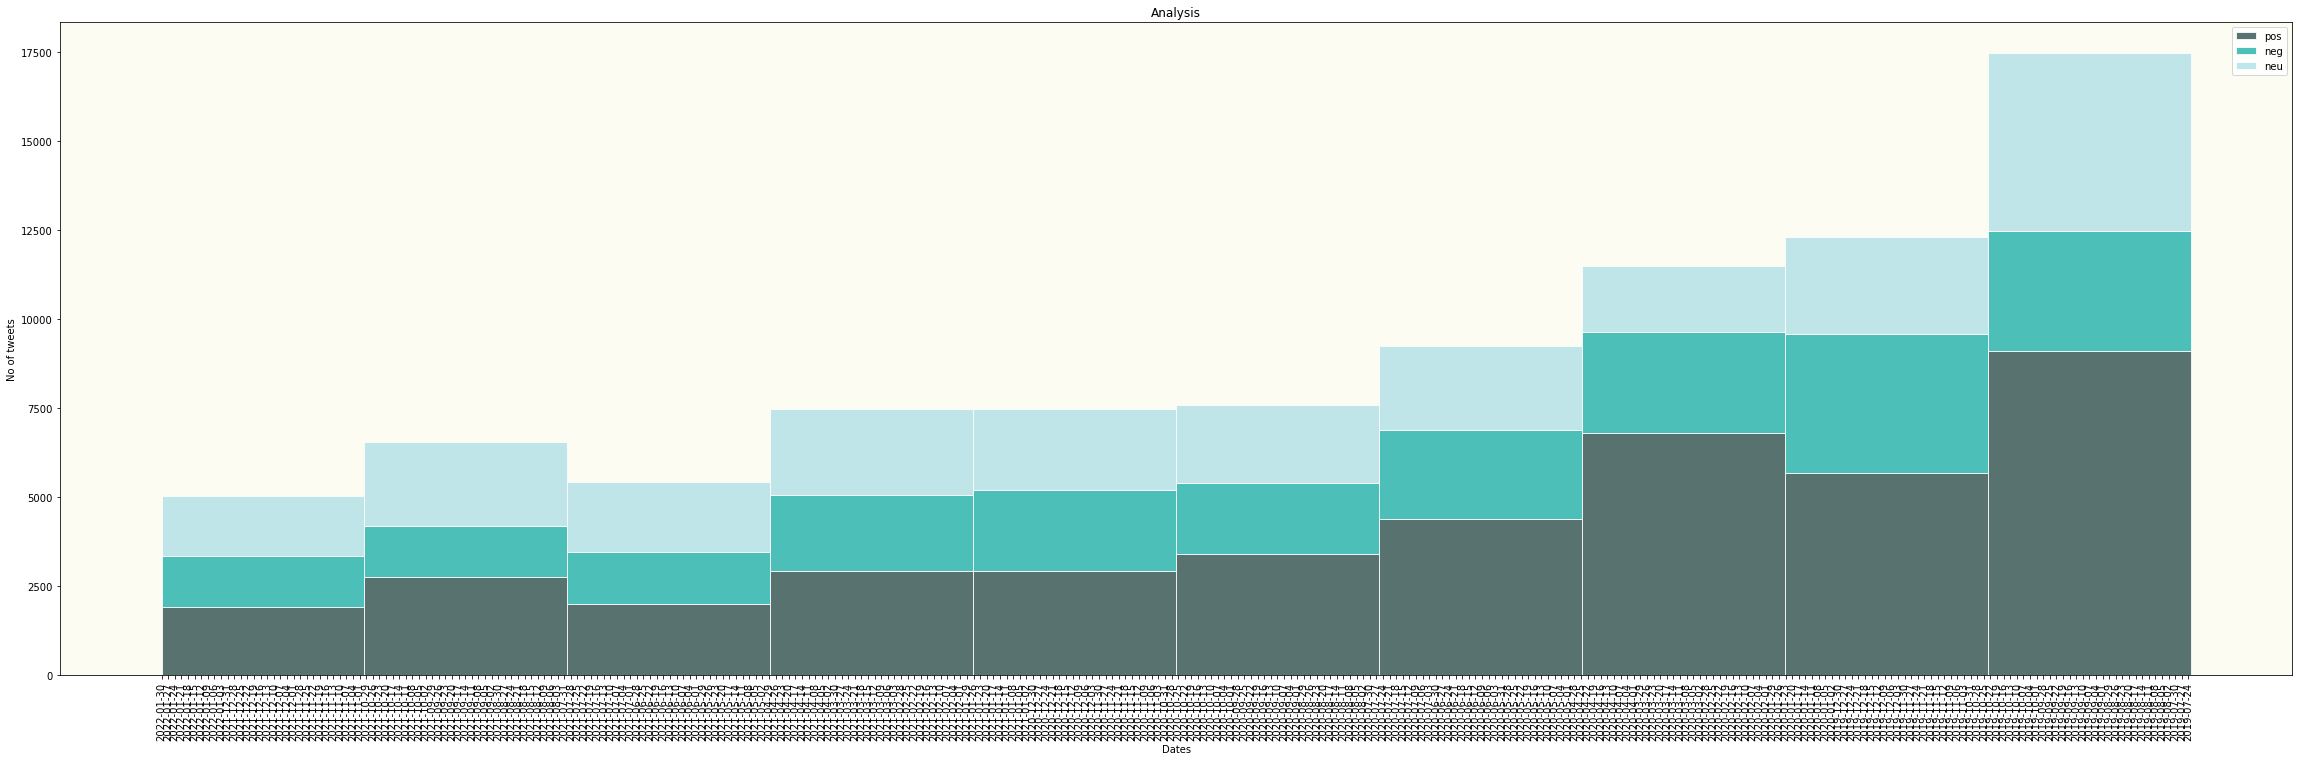

In [36]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(40,12))

cl_df = df["days"][df["labels"] == "pos"]
sa_df = df["days"][df["labels"] == "neg"]
tr_df = df["days"][df["labels"] == "neu"]
plt.hist([cl_df, sa_df,tr_df],label=["pos", "neg", "neu"],stacked=True,edgecolor = '1.0',alpha=0.8,color = ['darkslategrey','lightseagreen','powderblue'])
plt.legend()
plt.title("Analysis")
plt.xlabel("Dates")
plt.ylabel("No of tweets")
plt.xticks(rotation=90)
ax.set_xticks(ax.get_xticks()[::3])
ax.set_facecolor("#fcfcf2")
 
plt.show()

### Wordcloud for Sentiment Analysis in the period of July to dec 2019 tweets

In [37]:
from wordcloud import WordCloud,STOPWORDS

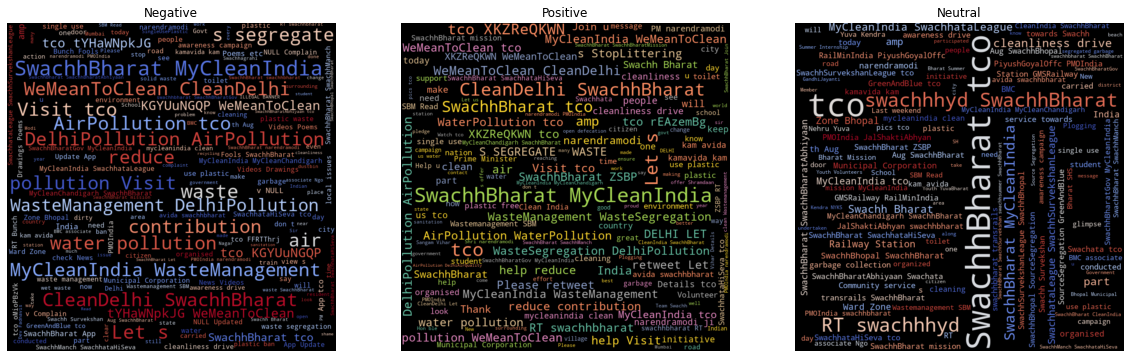

In [38]:
df['days'] = pd.to_datetime(df['days'])
mask = (df['days'] > '2019-07-01') & (df['days'] <= '2019-12-31')
g=df.loc[mask].reset_index(drop=False)

comment_words = ''
comment_words1 = ''
comment_words2 = ''
stopwords = set(STOPWORDS)
n=g[g['labels']=='neg']
p=g[g['labels']=='pos']
ne=g[g['labels']=='neu']

for val in n['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='coolwarm',
                min_font_size =10).generate(comment_words)

for val in p['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words1 += " ".join(tokens)+" "
 
wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words1)

for val in ne['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words2 += " ".join(tokens)+" "
 
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='coolwarm',
                min_font_size =10).generate(comment_words2)
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,7)) 
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Negative')

ax2.imshow(wordcloud1, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Positive')
  
ax3.imshow(wordcloud2, interpolation='bilinear')
ax3.axis("off")
ax3.set_title('Neutral')
     
plt.show()

### Conclusion
- In order to analyze the exact reason for posi and neg reviews in diff time period i have splitted the dataframe into 5 dataframe for period of 5 months each
- Swatchh bharat policy has brought a tremendous change in life of people living in rural areas by constryucting toilets and educating them about basic sanitation and cleanliness.
- People aren't taking the policy that seriously and that's why global warning and pollution in delhi isn't reduced.

### Wordcloud for Sentiment Analysis in the period of Jan to June 2020 tweets

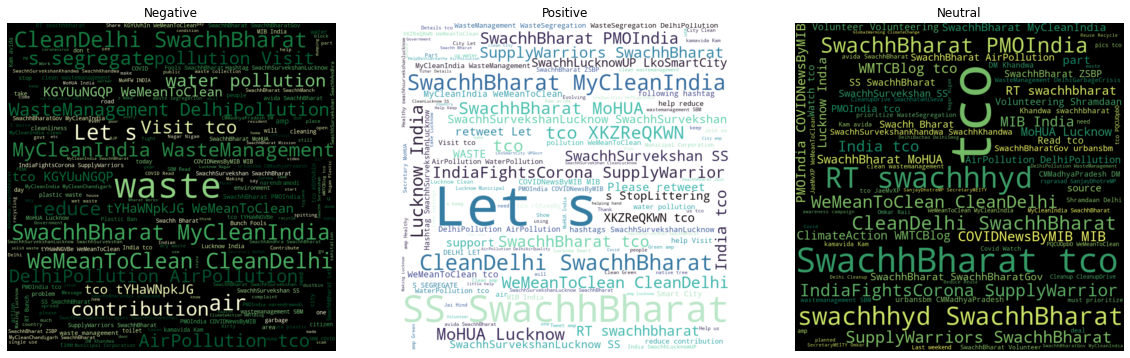

In [39]:
df['days'] = pd.to_datetime(df['days'])
mask1 = (df['days'] > '2020-01-01') & (df['days'] <= '2020-6-30')
g1=df.loc[mask1].reset_index(drop=False)

comment_words = ''
comment_words1 = ''
comment_words2 = ''
stopwords = set(STOPWORDS)
n=g1[g1['labels']=='neg']
p=g1[g1['labels']=='pos']
ne=g1[g1['labels']=='neu']

for val in n['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='YlGn',
                min_font_size =10).generate(comment_words)

for val in p['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words1 += " ".join(tokens)+" "
 
wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                colormap='mako',
                min_font_size =10).generate(comment_words1)

for val in ne['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words2 += " ".join(tokens)+" "
 
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='summer',
                min_font_size =10).generate(comment_words2)
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,7)) 
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Negative')

ax2.imshow(wordcloud1, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Positive')
  
ax3.imshow(wordcloud2, interpolation='bilinear')
ax3.axis("off")
ax3.set_title('Neutral')
     
plt.show()

### Wordcloud for Sentiment Analysis in the period of July to Dec 2020 tweets

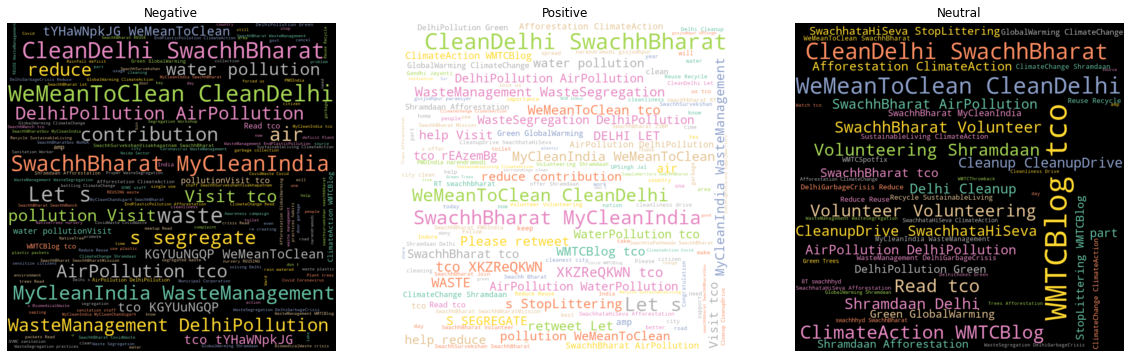

In [40]:
df['days'] = pd.to_datetime(df['days'])
mask2 = (df['days'] > '2020-07-01') & (df['days'] <= '2020-12-31')
g2=df.loc[mask2].reset_index(drop=False)

comment_words = ''
comment_words1 = ''
comment_words2 = ''
stopwords = set(STOPWORDS)
n=g2[g2['labels']=='neg']
p=g2[g2['labels']=='pos']
ne=g2[g2['labels']=='neu']

for val in n['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words)

for val in p['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words1 += " ".join(tokens)+" "
 
wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words1)

for val in ne['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words2 += " ".join(tokens)+" "
 
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words2)
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,7)) 
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Negative')

ax2.imshow(wordcloud1, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Positive')
  
ax3.imshow(wordcloud2, interpolation='bilinear')
ax3.axis("off")
ax3.set_title('Neutral')
     
plt.show()

### Wordcloud for Sentiment Analysis in the period of Jan to June 2021 tweets

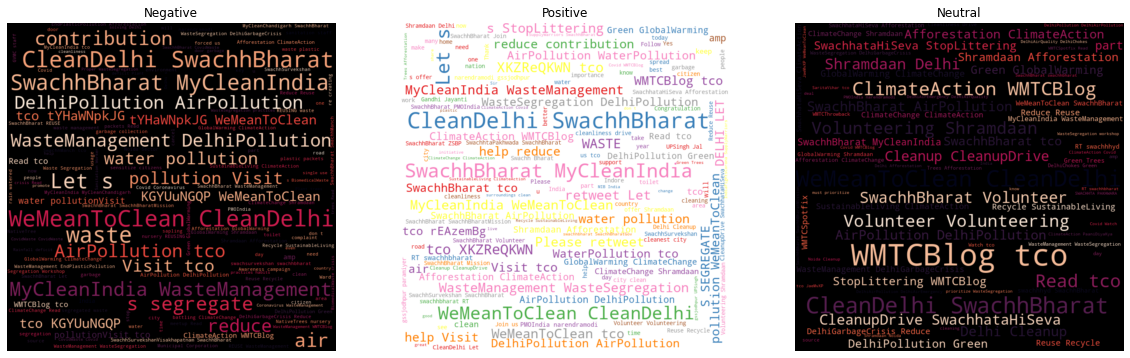

In [41]:
df['days'] = pd.to_datetime(df['days'])
mask3 = (df['days'] > '2021-01-01') & (df['days'] <= '2021-6-30')
g3=df.loc[mask2].reset_index(drop=False)

comment_words = ''
comment_words1 = ''
comment_words2 = ''
stopwords = set(STOPWORDS)
n=g3[g3['labels']=='neg']
p=g3[g3['labels']=='pos']
ne=g3[g3['labels']=='neu']

for val in n['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='rocket',
                min_font_size =10).generate(comment_words)

for val in p['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words1 += " ".join(tokens)+" "
 
wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                colormap='Set1',
                min_font_size =10).generate(comment_words1)

for val in ne['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words2 += " ".join(tokens)+" "
 
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='rocket',
                min_font_size =10).generate(comment_words2)
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,7)) 
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Negative')

ax2.imshow(wordcloud1, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Positive')
  
ax3.imshow(wordcloud2, interpolation='bilinear')
ax3.axis("off")
ax3.set_title('Neutral')
     
plt.show()

### Wordcloud for Sentiment Analysis in the period of July to Dec 2021 tweets

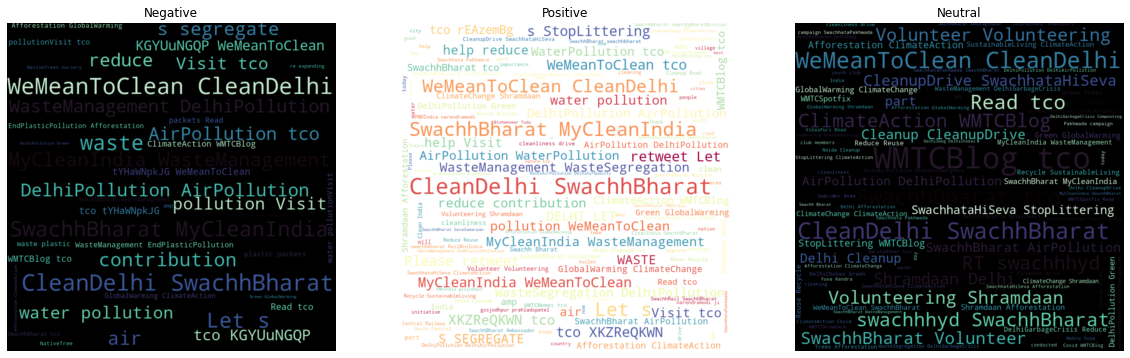

In [42]:
df['days'] = pd.to_datetime(df['days'])
mask4 = (df['days'] > '2021-07-01') & (df['days'] <= '2021-12-31')
g4=df.loc[mask4].reset_index(drop=False)

comment_words = ''
comment_words1 = ''
comment_words2 = ''
stopwords = set(STOPWORDS)
n=g4[g4['labels']=='neg']
p=g4[g4['labels']=='pos']
ne=g4[g4['labels']=='neu']

for val in n['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='mako',
                min_font_size =10).generate(comment_words)

for val in p['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words1 += " ".join(tokens)+" "
 
wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                colormap='Spectral',
                min_font_size =10).generate(comment_words1)

for val in ne['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words2 += " ".join(tokens)+" "
 
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='mako',
                min_font_size =10).generate(comment_words2)
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,7)) 
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Negative')

ax2.imshow(wordcloud1, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Positive')
  
ax3.imshow(wordcloud2, interpolation='bilinear')
ax3.axis("off")
ax3.set_title('Neutral')
     
plt.show()

## Frequency chart for all the tweets in time period between 2019 to 2021 for September and October months.

In [43]:
cl_data = (df['days'] > '2019-09-01') & (df['days'] <= '2019-10-31')
cl_data = df.loc[cl_data].reset_index(drop=False)

In [44]:
cl_data1 = (df['days'] > '2020-09-01') & (df['days'] <= '2020-10-31')
cl_data1 = df.loc[cl_data1].reset_index(drop=False)

In [45]:
cl_data2 = (df['days'] > '2021-09-01') & (df['days'] <= '2021-10-31')
cl_data2 = df.loc[cl_data2].reset_index(drop=False)

In [46]:
cl_data.days = cl_data.days.astype(str)
cl_data1.days = cl_data1.days.astype(str)
cl_data2.days = cl_data2.days.astype(str)

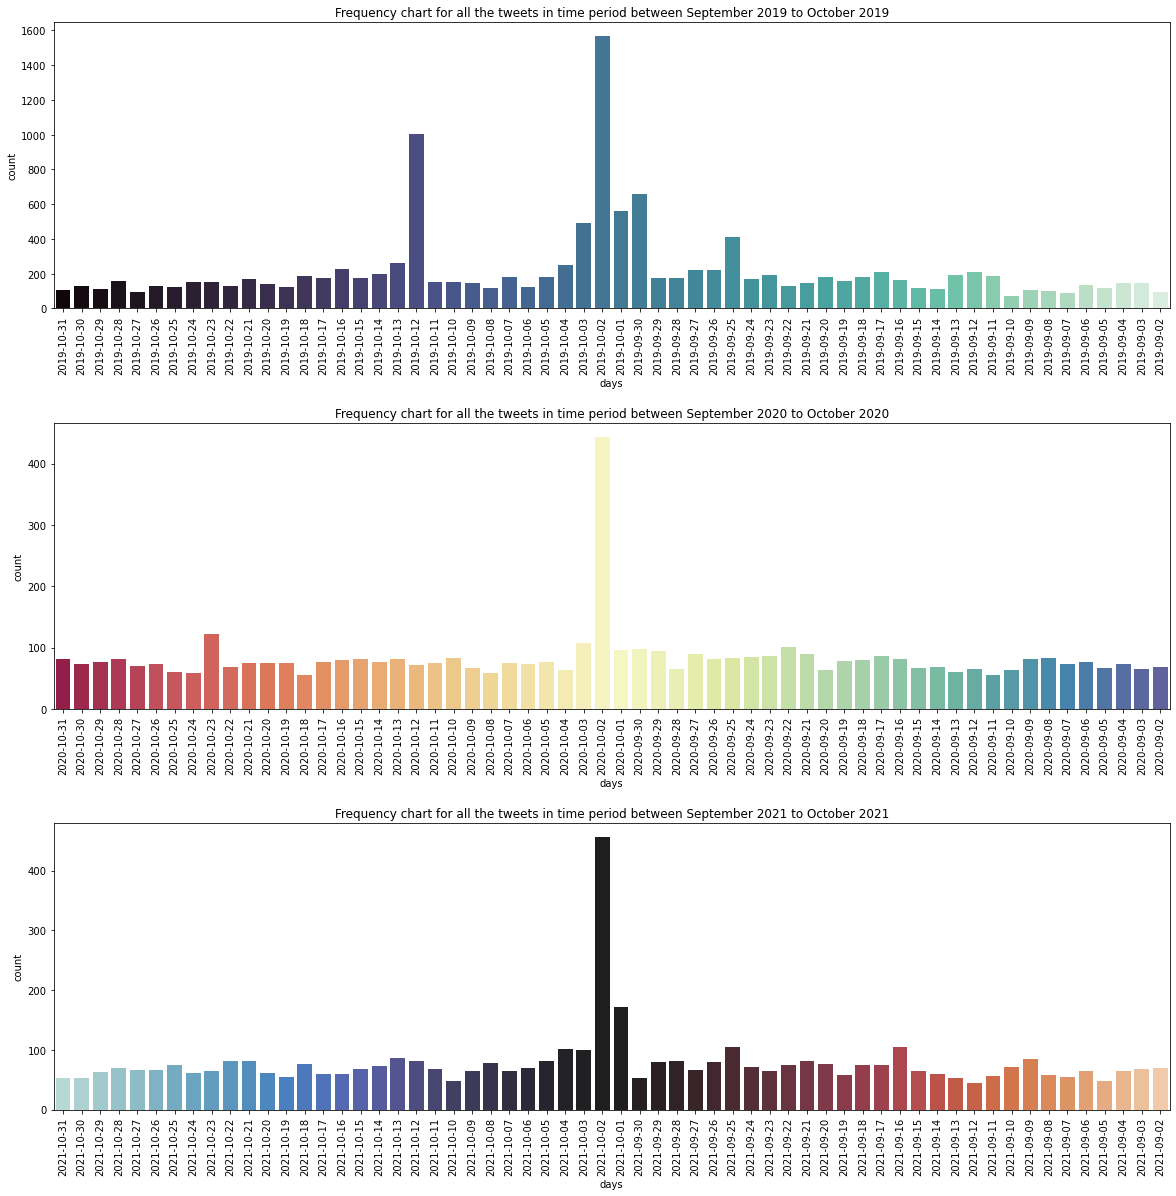

In [47]:
plt.figure(figsize=(20,20))

plt.subplot(311)
plt.title('Frequency chart for all the tweets in time period between September 2019 to October 2019')
sns.countplot(x='days',palette='mako',data=cl_data)
plt.xticks(rotation=90)

plt.subplot(312)
plt.title('Frequency chart for all the tweets in time period between September 2020 to October 2020')
sns.countplot(x='days',palette='Spectral', data=cl_data1)
plt.xticks(rotation=90)

plt.subplot(313)
plt.title('Frequency chart for all the tweets in time period between September 2021 to October 2021')
sns.countplot(x='days',palette='icefire', data=cl_data2)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.4)
plt.show()

### Conclusion
- In Above three graph, I have anlyzed the number of tweets over the time period.    
- We can observe that there was a peek at 2nd oct,that is on Gandhi Jayenthi for every year since the policy was associated with Mahatma Gandhi.

# Climate Change Related Hashtags in Swatchhbharat

### Frequency Chart for Top 5 Hashtags related to Climate change

In [22]:
df1 = dataset_hashtag_twitter[dataset_hashtag_twitter['Hashtags'].str.contains("climate")]
df1.head(15)

Hashtags  Frequency
8               climateaction       8500
22              climatechange       3529
375               climateacti         76
439             climatecrisis         60
465          climateemergency         56
1094                  climate         17
1401         climateactionnow         12
1707             actonclimate         10
1744  facetheclimateemergency          9
1852         climatechallenge          9
1866      climatestrikeonline          9
1929            climatestrike          9
2130      climatechangeisreal          8
3867      climateactionsummit          4
4173      climatechangecrisis          3

In [23]:
import plotly.express as px

fig2 = px.bar(df1[:5], x='Hashtags', y='Frequency',
              color='Hashtags',
              height=600, width=900)
fig2.show()

In [24]:
list1 = ['climateaction','climatechange','climateacti','climatecrisis','climateemergency']

In [25]:
climate_data = df[df['hashtags'].str.contains("climate")]
climate_data['climate_Hashtags'] = df['hashtags'].str.findall(r"\b"+"|".join(list1)+ r"\b").apply(", ".join)

<ipython-input-25-5bd6c7ae87f9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
nan_value = float("NaN")
climate_data.replace("", nan_value, inplace=True)

C:\Users\shamritha\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
climate_data = climate_data.dropna().reset_index(drop=False)

In [28]:
climate_data

index  level_0                   Datetime             Tweet Id  \
0     986     1058  2022-01-10 07:09:33+00:00  1480436635921575938   
1    1641     1767  2021-12-28 04:30:51+00:00  1475685652066930694   
2    3394     3682  2021-11-26 12:59:13+00:00  1464217177913905162   
3    7844     8701  2021-09-26 15:46:07+00:00  1442153519453114370   
4    8580     9498  2021-09-17 05:44:29+00:00  1438740621439680512   
..    ...      ...                        ...                  ...   
73  89599    99613  2019-07-26 08:06:42+00:00  1154664326218653696   
74  89600    99614  2019-07-26 08:01:02+00:00  1154662900226674689   
75  89825    99858  2019-07-24 08:51:31+00:00  1153950829134483456   
76  89828    99861  2019-07-24 08:45:23+00:00  1153949282757595136   
77  89830    99863  2019-07-24 08:41:42+00:00  1153948358009950210   

                                                 Text        Username  \
0   Waste soln lies in the heart of citizens' beha...      parasarora   
1   Can I truly call myself literate if I contribu...  smartenviroltd   
2   We sow what we reap. Rather than giving harmfu...         EzySpit   
3   An organisation is only as good as it's foot #...      AvnyLavasa   
4   On birthday of our beloved PMO Mr Modi we took...  calvin_hobbies   
..                                                ...             ...   
73  #recycle #smartcities #Swachhbharat #climatech...   SMS_Hydrotech   
74  #recycle #smartcities #Swachhbharat #climatech...   SMS_Hydrotech   
75  #recycle #smartcities #Swachhbharat #climatech...   SMS_Hydrotech   
76  #recycle #smartcities #Swachhbharat #climatech...   SMS_Hydrotech   
77  #recycle #smartcities #Swachhbharat #climatech...   SMS_Hydrotech   

                                             hashtags            location  \
0   ['solidwaste', 'climatechange', 'internetofthi...    New Delhi, India   
1   ['internationalliteracyday', 'cleanindia', 'wa...   Pune, Maharashtra   
2   ['BeResponsible', 'SpitFreeIndia', 'SwachhBhar...               India   
3   ['soldiers', 'Safaikarmcharis', 'clean', 'Swac...               India   
4   ['cleaningourneighbourhood', 'yiclimateactionw...               India   
..                                                ...                 ...   
73  ['recycle', 'smartcities', 'Swachhbharat', 'cl...  Faridabad, Haryana   
74  ['recycle', 'smartcities', 'Swachhbharat', 'cl...  Faridabad, Haryana   
75  ['recycle', 'smartcities', 'Swachhbharat', 'cl...  Faridabad, Haryana   
76  ['recycle', 'smartcities', 'Swachhbharat', 'cl...  Faridabad, Haryana   
77  ['recycle', 'smartcities', 'Swachhbharat', 'cl...  Faridabad, Haryana   

   climate_Hashtags  
0     climatechange  
1     climatechange  
2     climatechange  
3     climatechange  
4       climateacti  
..              ...  
73    climatechange  
74    climatechange  
75    climatechange  
76    climatechange  
77    climatechange  

[78 rows x 9 columns]

### Sentiment Analysis for Climate Related Hashtag

In [29]:
import re
climate_data['Text'] =climate_data['Text'].str.replace('\d+','')
climate_data['Text'] =climate_data['Text'].str.replace('.','')

In [30]:
def remove_pattern1(input_txt1):
    r = re.sub("[^a-zA-Z]"," ",str(input_txt1))
    r = re.findall(r"@(w+)", str(input_txt1))
    for i in r:
        input_txt1 = re.sub(i, '', input_txt1)      
    return input_txt1

In [31]:
climate_data['@_remove'] = np.vectorize(remove_pattern1)(climate_data['Text'])
climate_data['@_remove'][:3]

0    Waste soln lies in the heart of citizens' beha...
1    Can I truly call myself literate if I contribu...
2    We sow what we reap Rather than giving harmful...
Name: @_remove, dtype: object

In [32]:
def cleanTxt1(text1):
    text1 = re.sub('[^a-zA-Z]', ' ', str(text1))
    text1=re.sub(r'#','',str(text1))
    text1=re.sub('http[^\s]+','',str(text1))
    text1=re.sub(r'@[A-Za-z0-9]+','',str(text1))
    emoji_pattern1 = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern1.sub(r'', str(text1))

climate_data['Text']=climate_data['Text'].apply(cleanTxt1)

In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_scores1(sentence1):
    sid_obj1 = SentimentIntensityAnalyzer()
    sentiment_dict1 = sid_obj1.polarity_scores(sentence1)
    if sentiment_dict1['compound'] >= 0.05 :
        return "pos"
    elif sentiment_dict1['compound'] <= - 0.05 :
        return "neg"
    else :
        return "neu"

In [34]:
l=[sentiment_scores1(i) for i in climate_data.Text]
climate_data["labels"] = l

In [35]:
climate_data

index  level_0                   Datetime             Tweet Id  \
0     986     1058  2022-01-10 07:09:33+00:00  1480436635921575938   
1    1641     1767  2021-12-28 04:30:51+00:00  1475685652066930694   
2    3394     3682  2021-11-26 12:59:13+00:00  1464217177913905162   
3    7844     8701  2021-09-26 15:46:07+00:00  1442153519453114370   
4    8580     9498  2021-09-17 05:44:29+00:00  1438740621439680512   
..    ...      ...                        ...                  ...   
73  89599    99613  2019-07-26 08:06:42+00:00  1154664326218653696   
74  89600    99614  2019-07-26 08:01:02+00:00  1154662900226674689   
75  89825    99858  2019-07-24 08:51:31+00:00  1153950829134483456   
76  89828    99861  2019-07-24 08:45:23+00:00  1153949282757595136   
77  89830    99863  2019-07-24 08:41:42+00:00  1153948358009950210   

                                                 Text        Username  \
0   Waste soln lies in the heart of citizens  beha...      parasarora   
1   Can I truly call myself literate if I contribu...  smartenviroltd   
2   We sow what we reap Rather than giving harmful...         EzySpit   
3   An organisation is only as good as it s foot  ...      AvnyLavasa   
4   On birthday of our beloved PMO Mr Modi we took...  calvin_hobbies   
..                                                ...             ...   
73   recycle  smartcities  Swachhbharat  climatech...   SMS_Hydrotech   
74   recycle  smartcities  Swachhbharat  climatech...   SMS_Hydrotech   
75   recycle  smartcities  Swachhbharat  climatech...   SMS_Hydrotech   
76   recycle  smartcities  Swachhbharat  climatech...   SMS_Hydrotech   
77   recycle  smartcities  Swachhbharat  climatech...   SMS_Hydrotech   

                                             hashtags            location  \
0   ['solidwaste', 'climatechange', 'internetofthi...    New Delhi, India   
1   ['internationalliteracyday', 'cleanindia', 'wa...   Pune, Maharashtra   
2   ['BeResponsible', 'SpitFreeIndia', 'SwachhBhar...               India   
3   ['soldiers', 'Safaikarmcharis', 'clean', 'Swac...               India   
4   ['cleaningourneighbourhood', 'yiclimateactionw...               India   
..                                                ...                 ...   
73  ['recycle', 'smartcities', 'Swachhbharat', 'cl...  Faridabad, Haryana   
74  ['recycle', 'smartcities', 'Swachhbharat', 'cl...  Faridabad, Haryana   
75  ['recycle', 'smartcities', 'Swachhbharat', 'cl...  Faridabad, Haryana   
76  ['recycle', 'smartcities', 'Swachhbharat', 'cl...  Faridabad, Haryana   
77  ['recycle', 'smartcities', 'Swachhbharat', 'cl...  Faridabad, Haryana   

   climate_Hashtags                                           @_remove labels  
0     climatechange  Waste soln lies in the heart of citizens' beha...    neg  
1     climatechange  Can I truly call myself literate if I contribu...    neg  
2     climatechange  We sow what we reap Rather than giving harmful...    pos  
3     climatechange  An organisation is only as good as it's foot #...    pos  
4       climateacti  On birthday of our beloved PMO Mr Modi we took...    pos  
..              ...                                                ...    ...  
73    climatechange  #recycle #smartcities #Swachhbharat #climatech...    neg  
74    climatechange  #recycle #smartcities #Swachhbharat #climatech...    neg  
75    climatechange  #recycle #smartcities #Swachhbharat #climatech...    neg  
76    climatechange  #recycle #smartcities #Swachhbharat #climatech...    neg  
77    climatechange  #recycle #smartcities #Swachhbharat #climatech...    neg  

[78 rows x 11 columns]

### Sentiment Analysis plot

In [36]:
climate_data['Datetime']=pd.to_datetime(climate_data['Datetime'])
climate_data['Date']=climate_data['Datetime'].dt.to_period('D').astype(str)
climate_data['Month']=climate_data['Datetime'].dt.to_period('M').astype(str)

C:\Users\shamritha\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



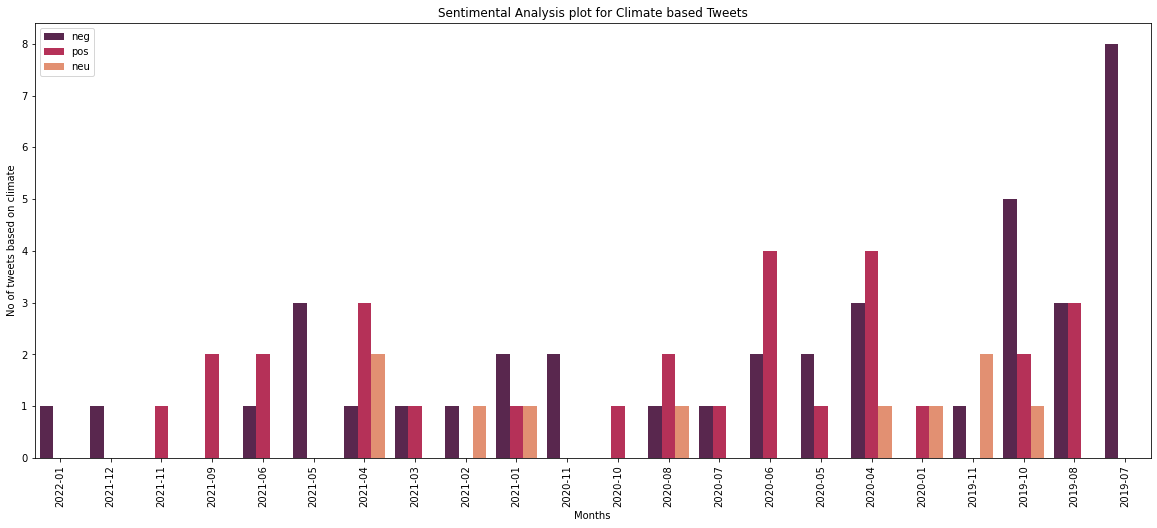

In [37]:
fig =plt.subplots(figsize=(20,8))
sns.countplot(x="Month", hue="labels", data=climate_data, palette='rocket')
plt.legend()
plt.title("Sentimental Analysis plot for Climate based Tweets")
plt.xlabel("Months")
plt.ylabel("No of tweets based on climate")
plt.xticks(rotation=90)
plt.show()

### Conclusion
- From the above graph we can observe that there is an increased neg feeling abount the problem climate change in terns of swatchhbharat as this problem still has not been addressed by this policy.

### Frequency plot for climate change based Tweets on weeks

In [38]:
climate_data['Week']=climate_data['Datetime'].dt.to_period('W').astype(str)

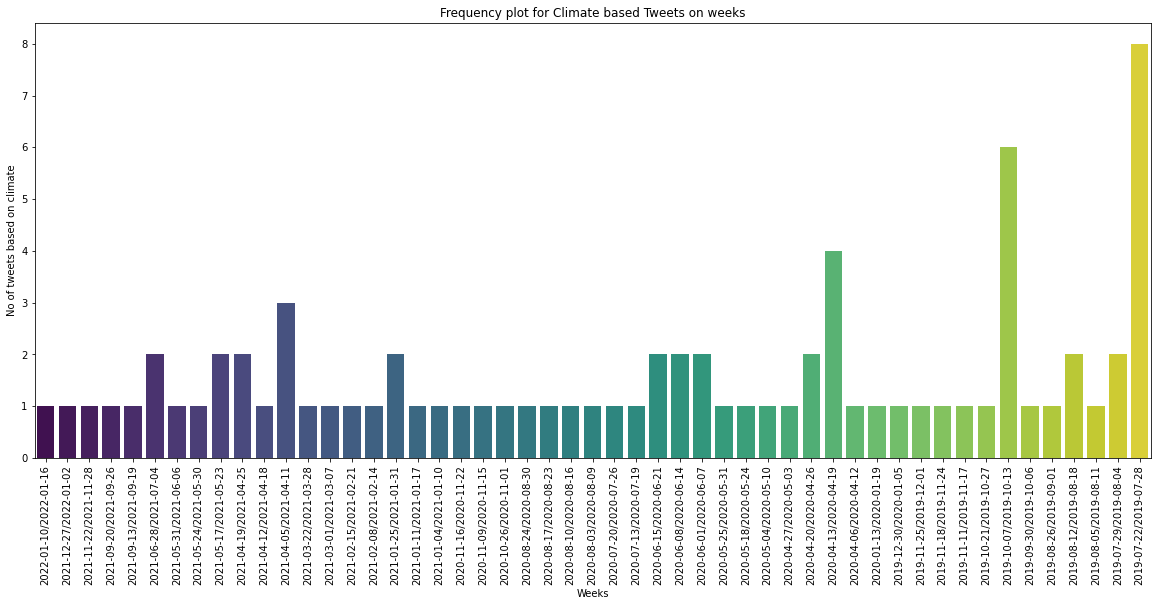

In [39]:
fig =plt.subplots(figsize=(20,8))
sns.countplot(x="Week", data=climate_data, palette='viridis')
plt.title("Frequency plot for Climate based Tweets on weeks")
plt.xlabel("Weeks")
plt.ylabel("No of tweets based on climate")
plt.xticks(rotation=90)
plt.show()

### Conclusion
- The above is climate change based frequency plot.
- We can observe that talk for the climate change has be peeked in 2019(7th month) and then the talk has been dropped from 2020

In [40]:
Tweet_words = ''

for val in climate_data['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        Tweet_words += " ".join(tokens)+" "

In [41]:
Tweet_words1 = Tweet_words.split()
Tweet_words2 = pd.DataFrame(Tweet_words1,columns=['Tweets'])
Tweet_words2

Tweets
0         Waste
1          soln
2          lies
3            in
4           the
...         ...
74233      fail
74234      with
74235  shoppers
74236       tco
74237  hqjjINwx

[74238 rows x 1 columns]

In [42]:
Tweet_words3 = pd.DataFrame(Tweet_words2['Tweets'].value_counts(),columns=['Tweets']).reset_index(drop=False)
Tweet_words3.rename(columns = {'Tweets':'Frequency'}, inplace = True)

In [43]:
Tweet_words3.rename(columns = {'index':'Tweets'}, inplace = True)

In [44]:
Tweet_words3 = Tweet_words3.drop(labels=[0],axis=0)

In [45]:
Tweet_words3

Tweets  Frequency
1     climatechange       1794
2                to       1679
3                of       1380
4               the       1364
5      SwachhBharat       1312
...             ...        ...
1040            Why         15
1041            bmc         15
1042      YMLmCzPDX          7
1043      greennews          7
1044          today          7

[1044 rows x 2 columns]

In [46]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
Tweet_words3['Tweets'] = Tweet_words3['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shamritha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
nan_value1 = float("NaN")
Tweet_words3.replace("", nan_value1, inplace=True)
Tweet_words3 = Tweet_words3.dropna().reset_index(drop=False)

In [48]:
Tweet_words3 = Tweet_words3.sort_values('Frequency',ascending=False).reset_index(drop=False)

### Frequency chart for tweets based on #climate

In [49]:
Tweet_words3

level_0  index         Tweets  Frequency
0          0      1  climatechange       1794
1          1      5   SwachhBharat       1312
2          2      7          waste        979
3          3      8   swachhbharat        828
4          4      9    environment        773
..       ...    ...            ...        ...
961      961   1040            Why         15
962      962   1041            bmc         15
963      963   1042      YMLmCzPDX          7
964      964   1043      greennews          7
965      965   1044          today          7

[966 rows x 4 columns]

In [50]:
import plotly.express as px

fig3 = px.bar(Tweet_words3[:40], x='Tweets', y='Frequency',
              color='Tweets',
              height=600, width=900)
fig3.show()

### Conclusion
- From this plot, we can say that people have been tweeting more about climate change in swachhbharat mission. 
- Knowing about swatchhbharat, people aren't reducing the usage of platics and causes pollution, global warming which leads the masive change in climate all over India. 